In [1]:
import pandas    as pd
from   sklearn.linear_model    import LinearRegression
from   sklearn.metrics         import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv files
merge =  pd.read_csv("../data/Olympics_merged.csv")

In [4]:
# total sport and event participation by games and country
medals = pd.DataFrame(merge.groupby(['Games','NOC','region'])['Name','Sport','Event'].nunique())
medals.head()

<ipython-input-4-71f4e9767915>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medals = pd.DataFrame(merge.groupby(['Games','NOC','region'])['Name','Sport','Event'].nunique())


Name  Sport  Event
Games       NOC region                       
1896 Summer AUS Australia     1      2      5
            AUT Austria       3      3      8
            DEN Denmark       3      5     12
            FRA France       12      6     18
            GBR UK           10      7     19

In [5]:
# total medal count by games and country
df     = pd.DataFrame(merge.groupby(['Games','NOC','region','Event'])['Medal'].nunique())
df     = df.groupby(['Games','NOC','region']).sum()
medals = medals.merge(df, left_index=True, right_index=True)
medals.head()

Name  Sport  Event  Medal
Games       NOC region                              
1896 Summer AUS Australia     1      2      5      3
            AUT Austria       3      3      8      5
            DEN Denmark       3      5     12      6
            FRA France       12      6     18     11
            GBR UK           10      7     19      9

In [6]:
# total medal count by games and country
df     = merge.groupby(['Games','NOC','region','Event'])['Gold','Silver','Bronze'].sum()
df     = df.clip(upper=1)
df     = df.groupby(['Games','NOC','region']).sum()
medals = medals.merge(df, left_index=True, right_index=True)
medals.head()

<ipython-input-6-b6edfe3e8ec5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df     = merge.groupby(['Games','NOC','region','Event'])['Gold','Silver','Bronze'].sum()


Name  Sport  Event  Medal  Gold  Silver  Bronze
Games       NOC region                                                    
1896 Summer AUS Australia     1      2      5      3     2       0       1
            AUT Austria       3      3      8      5     2       1       2
            DEN Denmark       3      5     12      6     1       2       3
            FRA France       12      6     18     11     5       4       2
            GBR UK           10      7     19      9     3       3       3

In [7]:
# season, year and home-field advantage by games and country
df     = pd.DataFrame(merge.groupby(['Games','NOC','region'])['Summer','Year','Home Field'].mean())
medals = medals.merge(df, left_index=True, right_index=True)
medals.head()

<ipython-input-7-f4631c6083c4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df     = pd.DataFrame(merge.groupby(['Games','NOC','region'])['Summer','Year','Home Field'].mean())


Name  Sport  Event  Medal  Gold  Silver  Bronze  \
Games       NOC region                                                       
1896 Summer AUS Australia     1      2      5      3     2       0       1   
            AUT Austria       3      3      8      5     2       1       2   
            DEN Denmark       3      5     12      6     1       2       3   
            FRA France       12      6     18     11     5       4       2   
            GBR UK           10      7     19      9     3       3       3   

                           Summer  Year  Home Field  
Games       NOC region                               
1896 Summer AUS Australia     1.0  1896         0.0  
            AUT Austria       1.0  1896         0.0  
            DEN Denmark       1.0  1896         0.0  
            FRA France        1.0  1896         0.0  
            GBR UK            1.0  1896         0.0

In [8]:
medals = medals.reset_index()
medals['Gold']       = medals['Gold'].astype('int64')
medals['Silver']     = medals['Silver'].astype('int64')
medals['Bronze']     = medals['Bronze'].astype('int64')
medals['Summer']     = medals['Summer'].astype('int64')
medals['Home Field'] = medals['Home Field'].astype('int64')
medals.head()

,Games,NOC,region,Name,Sport,Event,Medal,Gold,Silver,Bronze,Summer,Year,Home Field
0,1896 Summer,AUS,Australia,1,2,5,3,2,0,1,1,1896,0
1,1896 Summer,AUT,Austria,3,3,8,5,2,1,2,1,1896,0
2,1896 Summer,DEN,Denmark,3,5,12,6,1,2,3,1,1896,0
3,1896 Summer,FRA,France,12,6,18,11,5,4,2,1,1896,0
4,1896 Summer,GBR,UK,10,7,19,9,3,3,3,1,1896,0


In [9]:
medals = medals.rename(columns={'Name':    'Name',
                                'Medal':      'Medals',
                                'Gold':       'Golds',
                                'Silver':     'Silvers',
                                'Bronze':     'Bronzes',
                                'Sport':      'Sports',
                                'Event':      'Events',
                                'Home Field': 'Host'})
medals.head()

,Games,NOC,region,Name,Sports,Events,Medals,Golds,Silvers,Bronzes,Summer,Year,Host
0,1896 Summer,AUS,Australia,1,2,5,3,2,0,1,1,1896,0
1,1896 Summer,AUT,Austria,3,3,8,5,2,1,2,1,1896,0
2,1896 Summer,DEN,Denmark,3,5,12,6,1,2,3,1,1896,0
3,1896 Summer,FRA,France,12,6,18,11,5,4,2,1,1896,0
4,1896 Summer,GBR,UK,10,7,19,9,3,3,3,1,1896,0


In [10]:
medals = medals[['Year',
                 'Summer',
                 'Games',
                 'Host',
                 'NOC',
                 'region',
                 'Name',
                 'Sports',
                 'Events',
                 'Medals',
                 'Golds',
                 'Silvers',
                 'Bronzes']]
medals.head()

,Year,Summer,Games,Host,NOC,region,Name,Sports,Events,Medals,Golds,Silvers,Bronzes
0,1896,1,1896 Summer,0,AUS,Australia,1,2,5,3,2,0,1
1,1896,1,1896 Summer,0,AUT,Austria,3,3,8,5,2,1,2
2,1896,1,1896 Summer,0,DEN,Denmark,3,5,12,6,1,2,3
3,1896,1,1896 Summer,0,FRA,France,12,6,18,11,5,4,2
4,1896,1,1896 Summer,0,GBR,UK,10,7,19,9,3,3,3


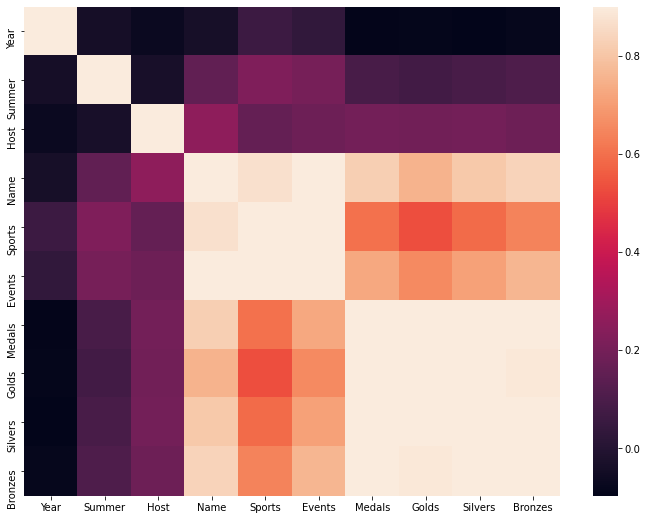

In [14]:
#correlation matrix
corrmat = medals.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.9)
plt.savefig('../Static/Images/heatmap.png')


In [15]:
medals['Name Event'] = (medals['Name'] / medals['Events']).round(3)
medals.head()

,Year,Summer,Games,Host,NOC,region,Name,Sports,Events,Medals,Golds,Silvers,Bronzes,Name Event
0,1896,1,1896 Summer,0,AUS,Australia,1,2,5,3,2,0,1,0.200
1,1896,1,1896 Summer,0,AUT,Austria,3,3,8,5,2,1,2,0.375
2,1896,1,1896 Summer,0,DEN,Denmark,3,5,12,6,1,2,3,0.250
3,1896,1,1896 Summer,0,FRA,France,12,6,18,11,5,4,2,0.667
4,1896,1,1896 Summer,0,GBR,UK,10,7,19,9,3,3,3,0.526


In [16]:
model        = pd.get_dummies(data=medals, columns=['NOC'])
model['NOC'] = medals['NOC']
model

,Year,Summer,Games,Host,region,Name,Sports,Events,Medals,Golds,...,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM,NOC
0,1896,1,1896 Summer,0,Australia,1,2,5,3,2,...,0,0,0,0,0,0,0,0,0,AUS
1,1896,1,1896 Summer,0,Austria,3,3,8,5,2,...,0,0,0,0,0,0,0,0,0,AUT
2,1896,1,1896 Summer,0,Denmark,3,5,12,6,1,...,0,0,0,0,0,0,0,0,0,DEN
3,1896,1,1896 Summer,0,France,12,6,18,11,5,...,0,0,0,0,0,0,0,0,0,FRA
4,1896,1,1896 Summer,0,UK,10,7,19,9,3,...,0,0,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,2016,1,2016 Summer,0,Vietnam,22,10,24,2,1,...,0,0,0,0,0,0,0,0,0,VIE
3828,2016,1,2016 Summer,0,Saint Vincent,4,2,4,0,0,...,1,0,0,0,0,0,0,0,0,VIN
3829,2016,1,2016 Summer,0,Yemen,3,3,3,0,0,...,0,0,0,0,1,0,0,0,0,YEM
3830,2016,1,2016 Summer,0,Zambia,7,4,7,0,0,...,0,0,0,0,0,0,0,1,0,ZAM


In [17]:
# model = model[model['Year'] >= 1992]
model = model.reset_index().drop(['index'], axis=1)
model

,Year,Summer,Games,Host,region,Name,Sports,Events,Medals,Golds,...,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM,NOC
0,1896,1,1896 Summer,0,Australia,1,2,5,3,2,...,0,0,0,0,0,0,0,0,0,AUS
1,1896,1,1896 Summer,0,Austria,3,3,8,5,2,...,0,0,0,0,0,0,0,0,0,AUT
2,1896,1,1896 Summer,0,Denmark,3,5,12,6,1,...,0,0,0,0,0,0,0,0,0,DEN
3,1896,1,1896 Summer,0,France,12,6,18,11,5,...,0,0,0,0,0,0,0,0,0,FRA
4,1896,1,1896 Summer,0,UK,10,7,19,9,3,...,0,0,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,2016,1,2016 Summer,0,Vietnam,22,10,24,2,1,...,0,0,0,0,0,0,0,0,0,VIE
3828,2016,1,2016 Summer,0,Saint Vincent,4,2,4,0,0,...,1,0,0,0,0,0,0,0,0,VIN
3829,2016,1,2016 Summer,0,Yemen,3,3,3,0,0,...,0,0,0,0,1,0,0,0,0,YEM
3830,2016,1,2016 Summer,0,Zambia,7,4,7,0,0,...,0,0,0,0,0,0,0,1,0,ZAM


In [18]:
y = model[['Medals','Golds','Silvers','Bronzes','Year','NOC','region']]
y.head()

,Medals,Golds,Silvers,Bronzes,Year,NOC,region
0,3,2,0,1,1896,AUS,Australia
1,5,2,1,2,1896,AUT,Austria
2,6,1,2,3,1896,DEN,Denmark
3,11,5,4,2,1896,FRA,France
4,9,3,3,3,1896,GBR,UK


In [19]:
X = model[['Year','NOC','region','Summer','Host','Name','Events','Name Event', 
           'NOC_USA','NOC_GER','NOC_GBR','NOC_FRA','NOC_ITA',
           'NOC_SWE','NOC_CHN','NOC_RUS','NOC_AUS','NOC_HUN',
           'NOC_JPN']]
X.head()

,Year,NOC,region,Summer,Host,Name,Events,Name Event,NOC_USA,NOC_GER,NOC_GBR,NOC_FRA,NOC_ITA,NOC_SWE,NOC_CHN,NOC_RUS,NOC_AUS,NOC_HUN,NOC_JPN
0,1896,AUS,Australia,1,0,1,5,0.200,0,0,0,0,0,0,0,0,1,0,0
1,1896,AUT,Austria,1,0,3,8,0.375,0,0,0,0,0,0,0,0,0,0,0
2,1896,DEN,Denmark,1,0,3,12,0.250,0,0,0,0,0,0,0,0,0,0,0
3,1896,FRA,France,1,0,12,18,0.667,0,0,0,1,0,0,0,0,0,0,0
4,1896,GBR,UK,1,0,10,19,0.526,0,0,1,0,0,0,0,0,0,0,0


In [20]:
X_train = X[X['Year'] <  2016]
X_test  = X[X['Year'] == 2016]
X_test  = X_test.reset_index().drop(['index'], axis=1)

y_train = y[y['Year'] <  2016]
y_test  = y[y['Year'] == 2016]
y_test  = y_test.reset_index().drop(['index'], axis=1)


In [21]:
# Create linear regression objects
regr_golds   = LinearRegression()
regr_silvers = LinearRegression()
regr_bronzes = LinearRegression()

In [22]:
# Train the models using the training sets
regr_golds.fit(  X_train.drop(['Year','NOC','region'], axis=1), y_train['Golds'])
regr_silvers.fit(X_train.drop(['Year','NOC','region'], axis=1), y_train['Silvers'])
regr_bronzes.fit(X_train.drop(['Year','NOC','region'], axis=1), y_train['Bronzes'])

LinearRegression()

In [23]:
# Make predictions using the training sets
y_train['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_train.drop(['Year','NOC','region'], axis=1)), columns=['Golds Prediction'])
y_train['Golds Prediction']   = y_train['Golds Prediction'].astype('int64')
y_train['Golds Prediction']   = y_train['Golds Prediction'].clip(lower=0)

y_train['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_train.drop(['Year','NOC','region'], axis=1)), columns=['Silvers Prediction'])
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].astype('int64')
y_train['Silvers Prediction'] = y_train['Silvers Prediction'].clip(lower=0)

y_train['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_train.drop(['Year','NOC','region'], axis=1)), columns=['Bronzes Prediction'])
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].astype('int64')
y_train['Bronzes Prediction'] = y_train['Bronzes Prediction'].clip(lower=0)

y_train['Medals Prediction']  = y_train['Golds Prediction'] + y_train['Silvers Prediction'] + y_train['Bronzes Prediction']
y_train.head()

<ipython-input-23-fc784ec9e3d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Golds Prediction']   = pd.DataFrame(
<ipython-input-23-fc784ec9e3d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Golds Prediction']   = y_train['Golds Prediction'].astype('int64')
<ipython-input-23-fc784ec9e3d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Medals,Golds,Silvers,Bronzes,Year,NOC,region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,3,2,0,1,1896,AUS,Australia,0,0,0,0
1,5,2,1,2,1896,AUT,Austria,0,0,0,0
2,6,1,2,3,1896,DEN,Denmark,0,0,0,0
3,11,5,4,2,1896,FRA,France,0,0,0,0
4,9,3,3,3,1896,GBR,UK,0,0,0,0


In [24]:
print(regr_golds.intercept_)
print(regr_silvers.intercept_)
print(regr_bronzes.intercept_)


0.41572132785910987
0.3687394754737101
0.13937980791902316


In [25]:
# The coefficients
columns                          = X_train.columns.drop(['Year','NOC','region'])
features                         = pd.DataFrame(columns.T, columns=['Feature'])
features['Golds Coefficients']   = regr_golds.coef_.T
features['Silvers Coefficients'] = regr_silvers.coef_.T
features['Bronzes Coefficients'] = regr_bronzes.coef_.T

features = features.sort_values(by='Golds Coefficients', ascending=False).reset_index().drop(['index'],axis=1)
features

,Feature,Golds Coefficients,Silvers Coefficients,Bronzes Coefficients
0,NOC_USA,9.597675,5.616863,3.694215
1,NOC_CHN,3.986365,2.023420,0.868571
2,NOC_RUS,2.747157,1.986852,2.678375
3,NOC_HUN,1.104353,0.715124,0.738217
4,NOC_GER,0.820915,2.130067,1.769424
5,Name,0.085024,0.078567,0.065924
6,NOC_SWE,0.042645,0.322826,0.722757
7,Summer,-0.017051,-0.021408,-0.040224
8,Events,-0.076471,-0.068094,-0.041014
9,Name Event,-0.527541,-0.418687,-0.303994


In [26]:
# Make predictions using the test set
y_test['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(X_test.drop(['Year','NOC','region'], axis=1)), columns=['Golds Prediction'])
y_test['Golds Prediction']   = y_test['Golds Prediction'].astype('int64')
y_test['Golds Prediction']   = y_test['Golds Prediction'].clip(lower=0)

y_test['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(X_test.drop(['Year','NOC','region'], axis=1)), columns=['Silvers Prediction'])
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].astype('int64')
y_test['Silvers Prediction'] = y_test['Silvers Prediction'].clip(lower=0)

y_test['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(X_test.drop(['Year','NOC','region'], axis=1)), columns=['Bronzes Prediction'])
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].astype('int64')
y_test['Bronzes Prediction'] = y_test['Bronzes Prediction'].clip(lower=0)

y_test['Medals Prediction']  = y_test['Golds Prediction'] + y_test['Silvers Prediction'] + y_test['Bronzes Prediction']
y_test.head()

,Medals,Golds,Silvers,Bronzes,Year,NOC,region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,0,0,0,0,2016,AFG,Afghanistan,0,0,0,0
1,0,0,0,0,2016,ALB,Albania,0,0,0,0
2,2,0,2,0,2016,ALG,Algeria,1,1,1,3
3,0,0,0,0,2016,AND,Andorra,0,0,0,0
4,0,0,0,0,2016,ANG,Angola,0,0,0,0


In [27]:
medals_2016 = medals[medals['Games'] == '2016 Summer']
medals_2016 = y_test[['NOC','Medals Prediction']].merge(medals_2016, on='NOC')
medals_2016 = medals_2016.sort_values(by='Medals Prediction', ascending=False)
medals_2016.head()

,NOC,Medals Prediction,Year,Summer,Games,Host,region,Name,Sports,Events,Medals,Golds,Silvers,Bronzes,Name Event
196,USA,97,2016,1,2016 Summer,0,USA,555,33,245,121,46,37,38,2.265
26,BRA,57,2016,1,2016 Summer,1,Brazil,462,34,222,19,7,6,6,2.081
72,GER,57,2016,1,2016 Summer,0,Germany,418,29,217,42,17,10,15,1.926
10,AUS,55,2016,1,2016 Summer,0,Australia,420,31,194,29,8,11,10,2.165
38,CHN,54,2016,1,2016 Summer,0,China,390,32,209,70,26,18,26,1.866


In [28]:
variance1 = r2_score(y_train['Medals'], y_train['Medals Prediction'])
varaince2 = r2_score(y_test['Medals'],  y_test['Medals Prediction'])
print(variance1)
print(varaince2)

0.7461245396428564
0.7791481593665753


In [29]:
previous_medals = medals[medals['Year'] >= 2008]
previous_medals = previous_medals[previous_medals['Summer'] == 1]
previous_medals = previous_medals.groupby(
    ['NOC','region'])['Name','Sports','Events'].mean().astype('int64')
previous_medals = previous_medals.reset_index()
print(previous_medals.shape)
previous_medals.sort_values(by='Name',ascending=False).head()

(207, 5)


<ipython-input-29-dc9ce568609d>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  previous_medals = previous_medals.groupby(


,NOC,region,Name,Sports,Events
198,USA,USA,557,32,249
39,CHN,China,446,31,224
11,AUS,Australia,419,30,207
73,GER,Germany,407,28,212
69,GBR,UK,398,27,210


In [30]:
# copy Rio 2016 variables and update year
tokyo_2020_medals         = X_test
tokyo_2020_medals['Year'] = 2020

# change host to Japan
tokyo_2020_medals['Host']                                        = 0
tokyo_2020_medals.loc[tokyo_2020_medals['NOC'] == 'JPN', 'Host'] = 1

# update 2020 Athletes, Females, Sports and Events based on mean between 2008 and 2016
tokyo_2020_medals = tokyo_2020_medals.drop(['Name','Events'],axis=1)
tokyo_2020_medals = tokyo_2020_medals.merge(previous_medals)

# zero Athletes if no Events
tokyo_2020_medals.loc[tokyo_2020_medals['Events'] == 0, 'Name'] = 0

# update Athletes per Event
tokyo_2020_medals['Athletes per Event'] = tokyo_2020_medals['Name'] / tokyo_2020_medals['Events']
tokyo_2020_medals['Athletes per Event'] = (tokyo_2020_medals['Athletes per Event'].fillna(0)).round(3)

# reorder features
tokyo_2020_medals = tokyo_2020_medals[['Year','NOC','region',
                                       'Summer','Host','Name','Events','Athletes per Event', 
                                       'NOC_USA','NOC_GER','NOC_GBR','NOC_FRA','NOC_ITA',
                                       'NOC_SWE','NOC_CHN','NOC_RUS','NOC_AUS','NOC_HUN',
                                       'NOC_JPN']]

print(tokyo_2020_medals.shape)
tokyo_2020_medals.sort_values(by='Name',ascending=False).head()

(205, 19)


,Year,NOC,region,Summer,Host,Name,Events,Athletes per Event,NOC_USA,NOC_GER,NOC_GBR,NOC_FRA,NOC_ITA,NOC_SWE,NOC_CHN,NOC_RUS,NOC_AUS,NOC_HUN,NOC_JPN
196,2020,USA,USA,1,0,557,249,2.237,1,0,0,0,0,0,0,0,0,0,0
38,2020,CHN,China,1,0,446,224,1.991,0,0,0,0,0,0,1,0,0,0,0
10,2020,AUS,Australia,1,0,419,207,2.024,0,0,0,0,0,0,0,0,1,0,0
72,2020,GER,Germany,1,0,407,212,1.920,0,1,0,0,0,0,0,0,0,0,0
68,2020,GBR,UK,1,0,398,210,1.895,0,0,1,0,0,0,0,0,0,0,0


In [31]:
# Make predictions using the Tokyo 2020 set
y_2020                       = tokyo_2020_medals[['Year','NOC','region']]

y_2020['Golds Prediction']   = pd.DataFrame(
    regr_golds.predict(tokyo_2020_medals.drop(['Year','NOC','region'], axis=1)), columns=['Golds Prediction'])
y_2020['Golds Prediction']   = y_2020['Golds Prediction'].astype('int64')
y_2020['Golds Prediction']   = y_2020['Golds Prediction'].clip(lower=0)

y_2020['Silvers Prediction'] = pd.DataFrame(
    regr_silvers.predict(tokyo_2020_medals.drop(['Year','NOC','region'], axis=1)), columns=['Silvers Prediction'])
y_2020['Silvers Prediction'] = y_2020['Silvers Prediction'].astype('int64')
y_2020['Silvers Prediction'] = y_2020['Silvers Prediction'].clip(lower=0)

y_2020['Bronzes Prediction'] = pd.DataFrame(
    regr_bronzes.predict(tokyo_2020_medals.drop(['Year','NOC','region'], axis=1)), columns=['Bronzes Prediction'])
y_2020['Bronzes Prediction'] = y_2020['Bronzes Prediction'].astype('int64')
y_2020['Bronzes Prediction'] = y_2020['Bronzes Prediction'].clip(lower=0)

y_2020['Medals Prediction']  = y_2020['Golds Prediction'] + y_2020['Silvers Prediction'] + y_2020['Bronzes Prediction']
y_2020.head()

<ipython-input-31-bb793241a7f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2020['Golds Prediction']   = pd.DataFrame(
<ipython-input-31-bb793241a7f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_2020['Golds Prediction']   = y_2020['Golds Prediction'].astype('int64')
<ipython-input-31-bb793241a7f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,Year,NOC,region,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,2020,AFG,Afghanistan,0,0,0,0
1,2020,ALB,Albania,0,0,0,0
2,2020,ALG,Algeria,1,1,1,3
3,2020,AND,Andorra,0,0,0,0
4,2020,ANG,Angola,0,0,0,0


In [32]:
tokyo_2020_medals = y_2020.merge(tokyo_2020_medals, on=['Year','NOC','region'])
tokyo_2020_medals = tokyo_2020_medals.sort_values(by='Medals Prediction', ascending=False).reset_index()
tokyo_2020_medals = tokyo_2020_medals[['NOC','region','Host','Name','Events','Athletes per Event',
                   'Golds Prediction','Silvers Prediction','Bronzes Prediction','Medals Prediction']]
tokyp_2020_medals_top = tokyo_2020_medals.head(20)
tokyp_2020_medals_top

,NOC,region,Host,Name,Events,Athletes per Event,Golds Prediction,Silvers Prediction,Bronzes Prediction,Medals Prediction
0,USA,USA,0,557,249,2.237,37,31,29,97
1,CHN,China,0,446,224,1.991,24,21,20,65
2,GER,Germany,0,407,212,1.920,18,19,19,56
3,RUS,Russia,0,389,220,1.768,18,17,18,53
4,AUS,Australia,0,419,207,2.024,18,17,18,53
5,GBR,UK,0,398,210,1.895,15,15,16,46
6,BRA,Brazil,0,326,168,1.940,14,13,14,41
7,ESP,Spain,0,289,142,2.035,13,12,12,37
8,FRA,France,0,341,198,1.722,11,11,13,35
9,CAN,Canada,0,305,179,1.704,11,11,12,34


In [33]:
tokyp_2020_medals_top.to_csv('../data/prediction.csv')